<a href="https://colab.research.google.com/github/YaelMorenoPilar/SyS/blob/master/pruebashistondvi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import gdal
import csv
import os

In [5]:
#ruta de la imagen
ruta_img = "/content/drive/MyDrive/predios_landsat"
os.chdir(ruta_img)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [111]:
#Nombre de la Imagen
Landsat7 = "2002-12-21_2003-03-21.tif"

#La abrimos 
lsat = gdal.Open(Landsat7)

In [112]:
band5 = lsat.GetRasterBand(4) #NIR
band4 = lsat.GetRasterBand(3) #RED

nir = band5.ReadAsArray()
red = band4.ReadAsArray()
#Ecuacion del NDVI
ndvi = (nir- red) / (nir + red)

Text(0, 0.5, 'Row #')

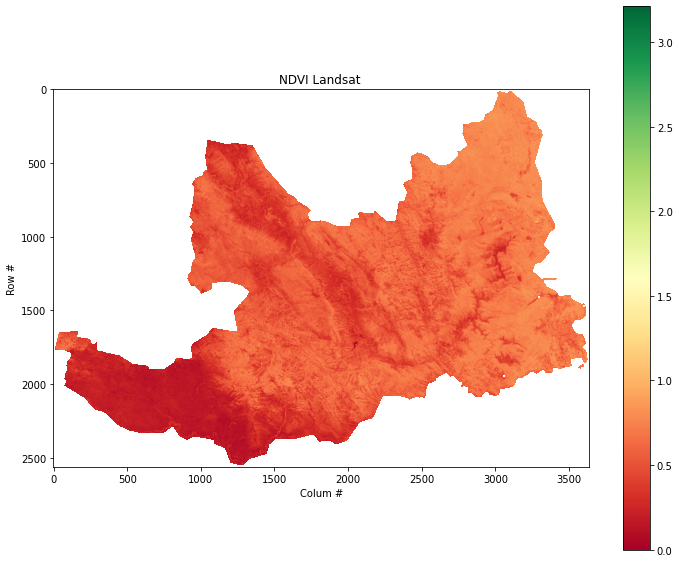

In [113]:
#mejorar el contraste 
ndvi[ndvi < -0] = 0
plt.figure(figsize=(12,10))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI Landsat ')
plt.xlabel('Colum #')
plt.ylabel('Row #')

In [114]:
#Creamos una matriz donde se almacenen los datos del ndvi, cordenada x, cordenada y, valor
matriz= []
filas = 3637 * 2561
columnas = 3
#columnas = 3
for i in range(filas):
  matriz.append([0]*columnas)


aux_f = 0 #fila ndvi 
aux_c = 0 #columna ndvi
ma_c = 0  #columna de la matriz
ma_f = 0  #fila de la matriz
for i in ndvi:
  aux_c= 0
  for j in i:
    if np.isnan(j):
      #print("Es un nan")
      j = 0  # es un nan y le asignamos el valor de 0
    else:
      #print(j)
      j = j  # No es un nan y se mantiene su valor
    #if ma_f > 2:
    ma_f = 0    
    matriz[ma_c][ma_f] = aux_c
    aux_c = aux_c + 1
    ma_f = ma_f + 1
    matriz[ma_c][ma_f] = aux_f
    ma_f = ma_f +1
    matriz[ma_c][ma_f] = j
    ma_c = ma_c + 1
  aux_f = aux_f +1

In [115]:
#Creamos el archivo csv 
archivo = open('histograma_ndvi_2002-12-21_2003-03-21.tif.csv','w')
#Lo cerramos 
archivo.close()

In [116]:
#Le pasamos los valores de la matriz a nuestro archivo
with open('histograma_ndvi_2002-12-21_2003-03-21.tif.csv','w', newline='') as file:
  for i in matriz:
    writer = csv.writer(file, delimiter=',')
    writer.writerow(i)

file.close()